## Exploratory Analysis & Data Visualisation

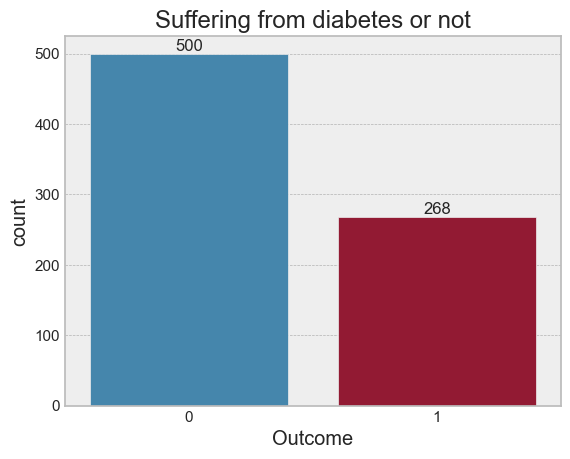

In [9]:
#Count of number of persons suffering diabetes
plt.style.use('bmh')
ax = sb.countplot(x= data.Outcome , data= data)
ax.bar_label(ax.containers[0])
ax.set_title('Suffering from diabetes or not')
plt.show()

<div class="alert alert-warning">
    <strong>We used the appropriate plots to visualize the data for each variable.</strong>

</div>


<AxesSubplot:title={'center':'Counter Plot'}, xlabel='Age', ylabel='count'>

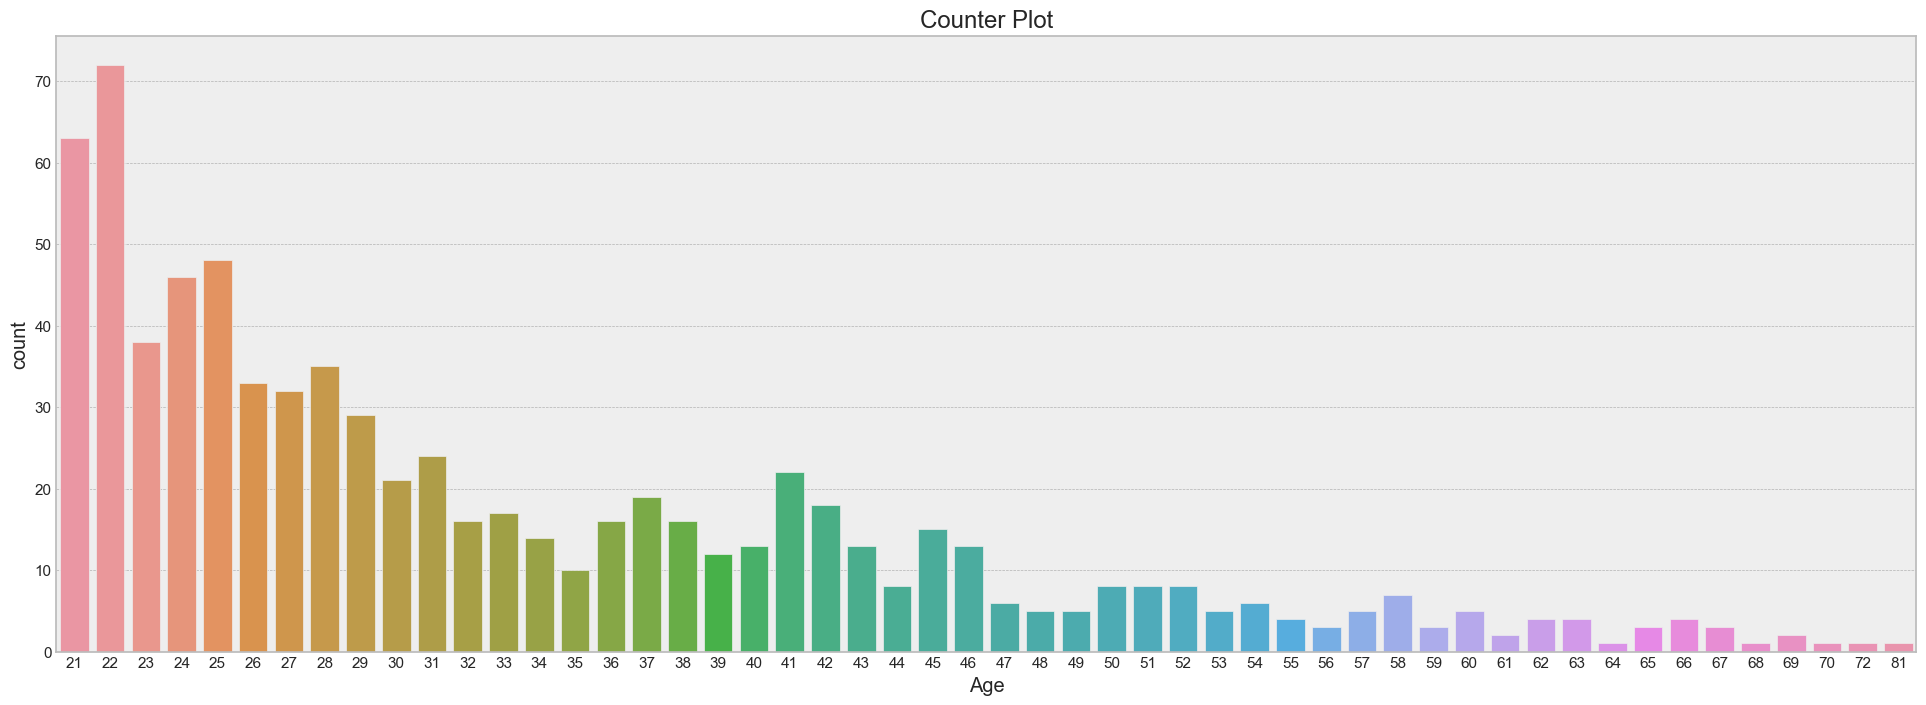

In [10]:
#Age
plt.figure(figsize=(24,8))

plt.title("Counter Plot")
sb.countplot(x = 'Age',data = data)

#plt.subplot(1,3,3)
#plt.title('Outcome Box Plot')
#sb.catplot(data = data, x="Age", y="Outcome", kind="box", orient = "h")

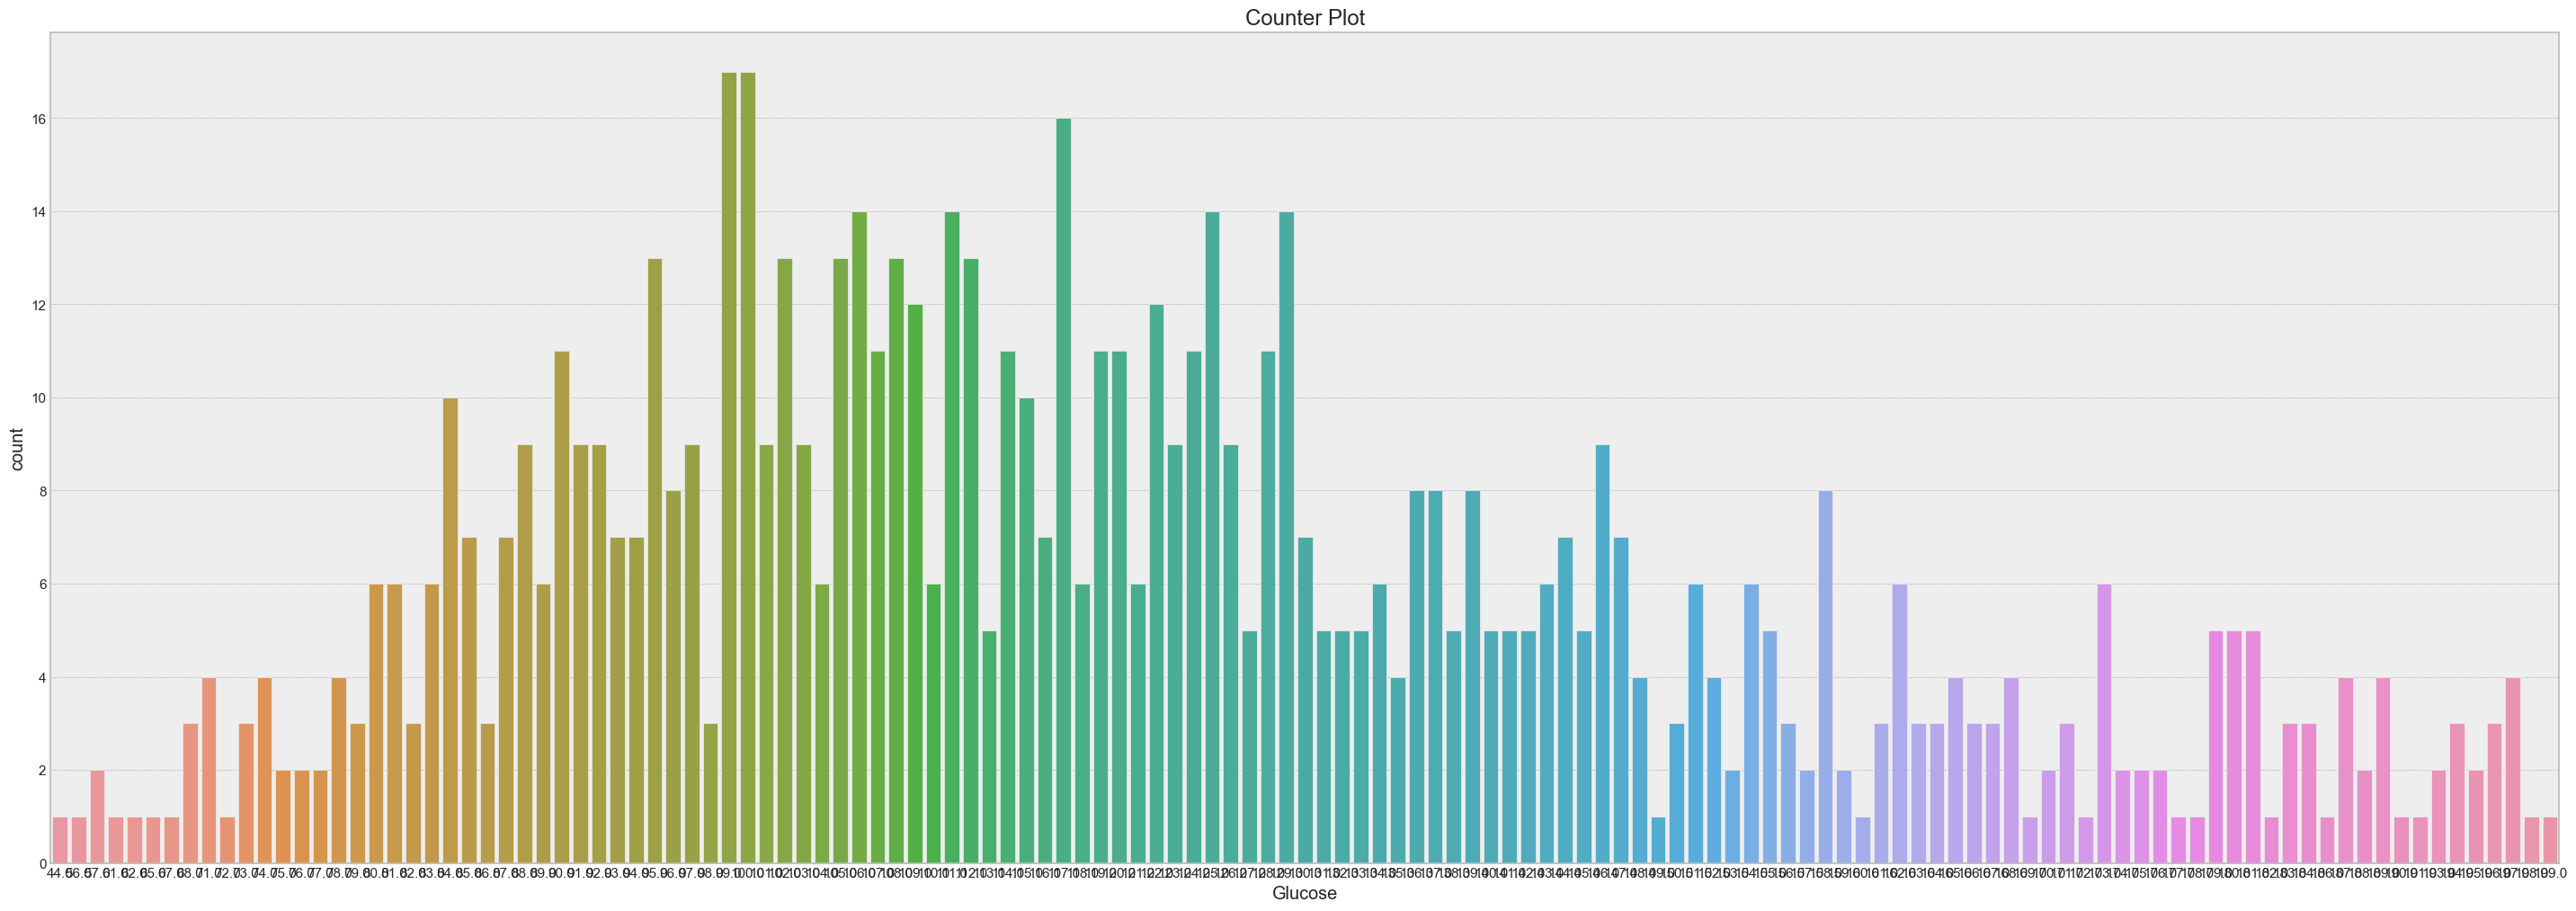

In [11]:
#Glucose
plt.figure(figsize=(36,12))

plt.title("Counter Plot")
sb.countplot(x = 'Glucose',data = data)

plt.show()

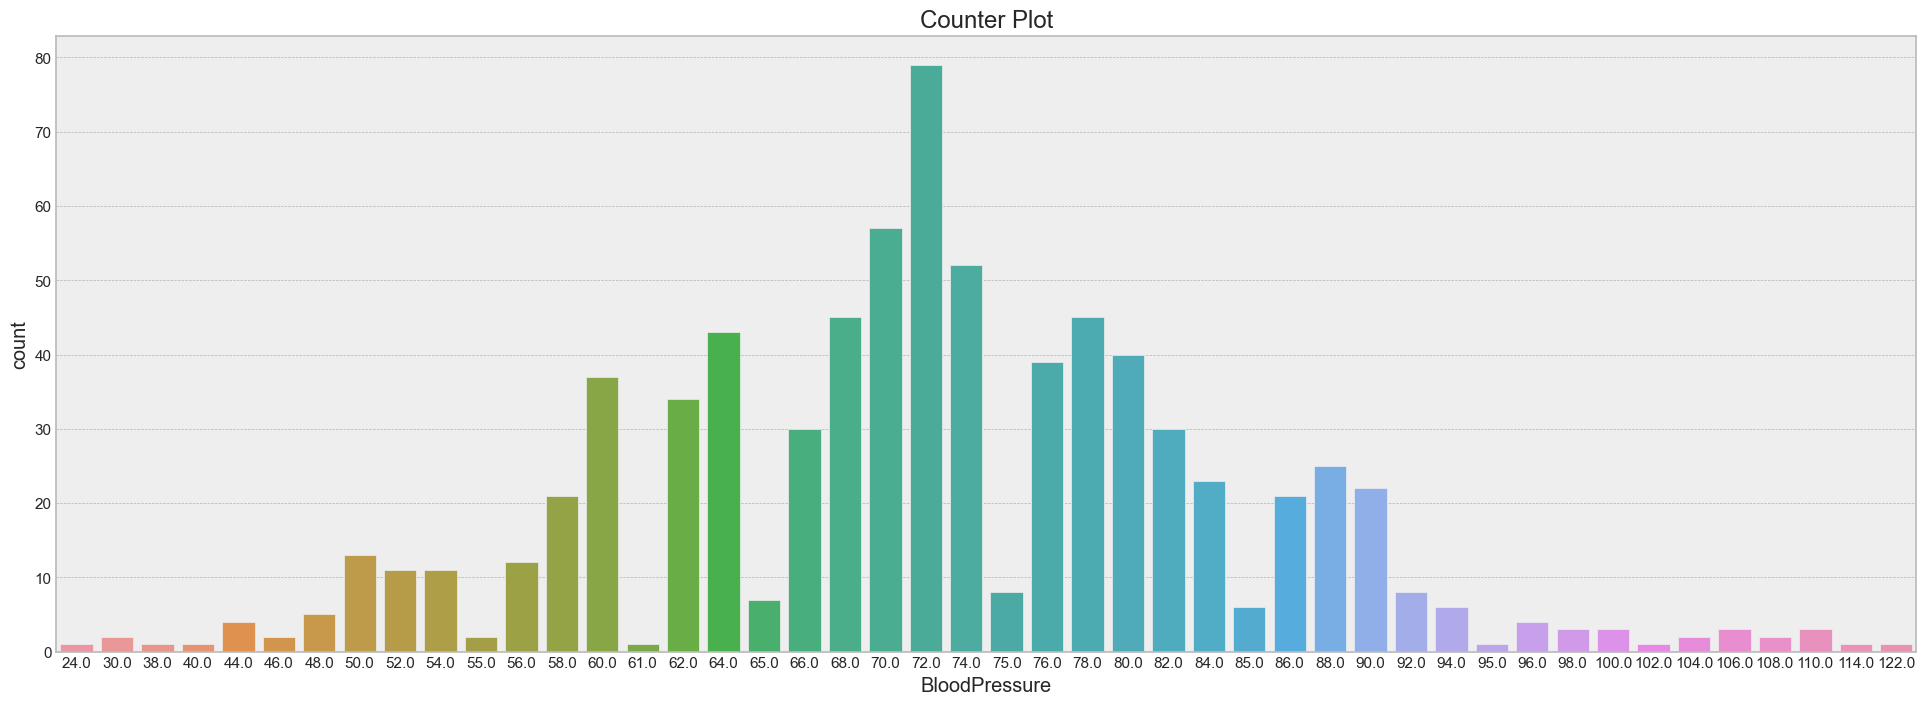

In [12]:
#Blood Pressure
plt.figure(figsize=(24,8))

plt.title("Counter Plot")
sb.countplot(x = 'BloodPressure',data = data)

plt.show()

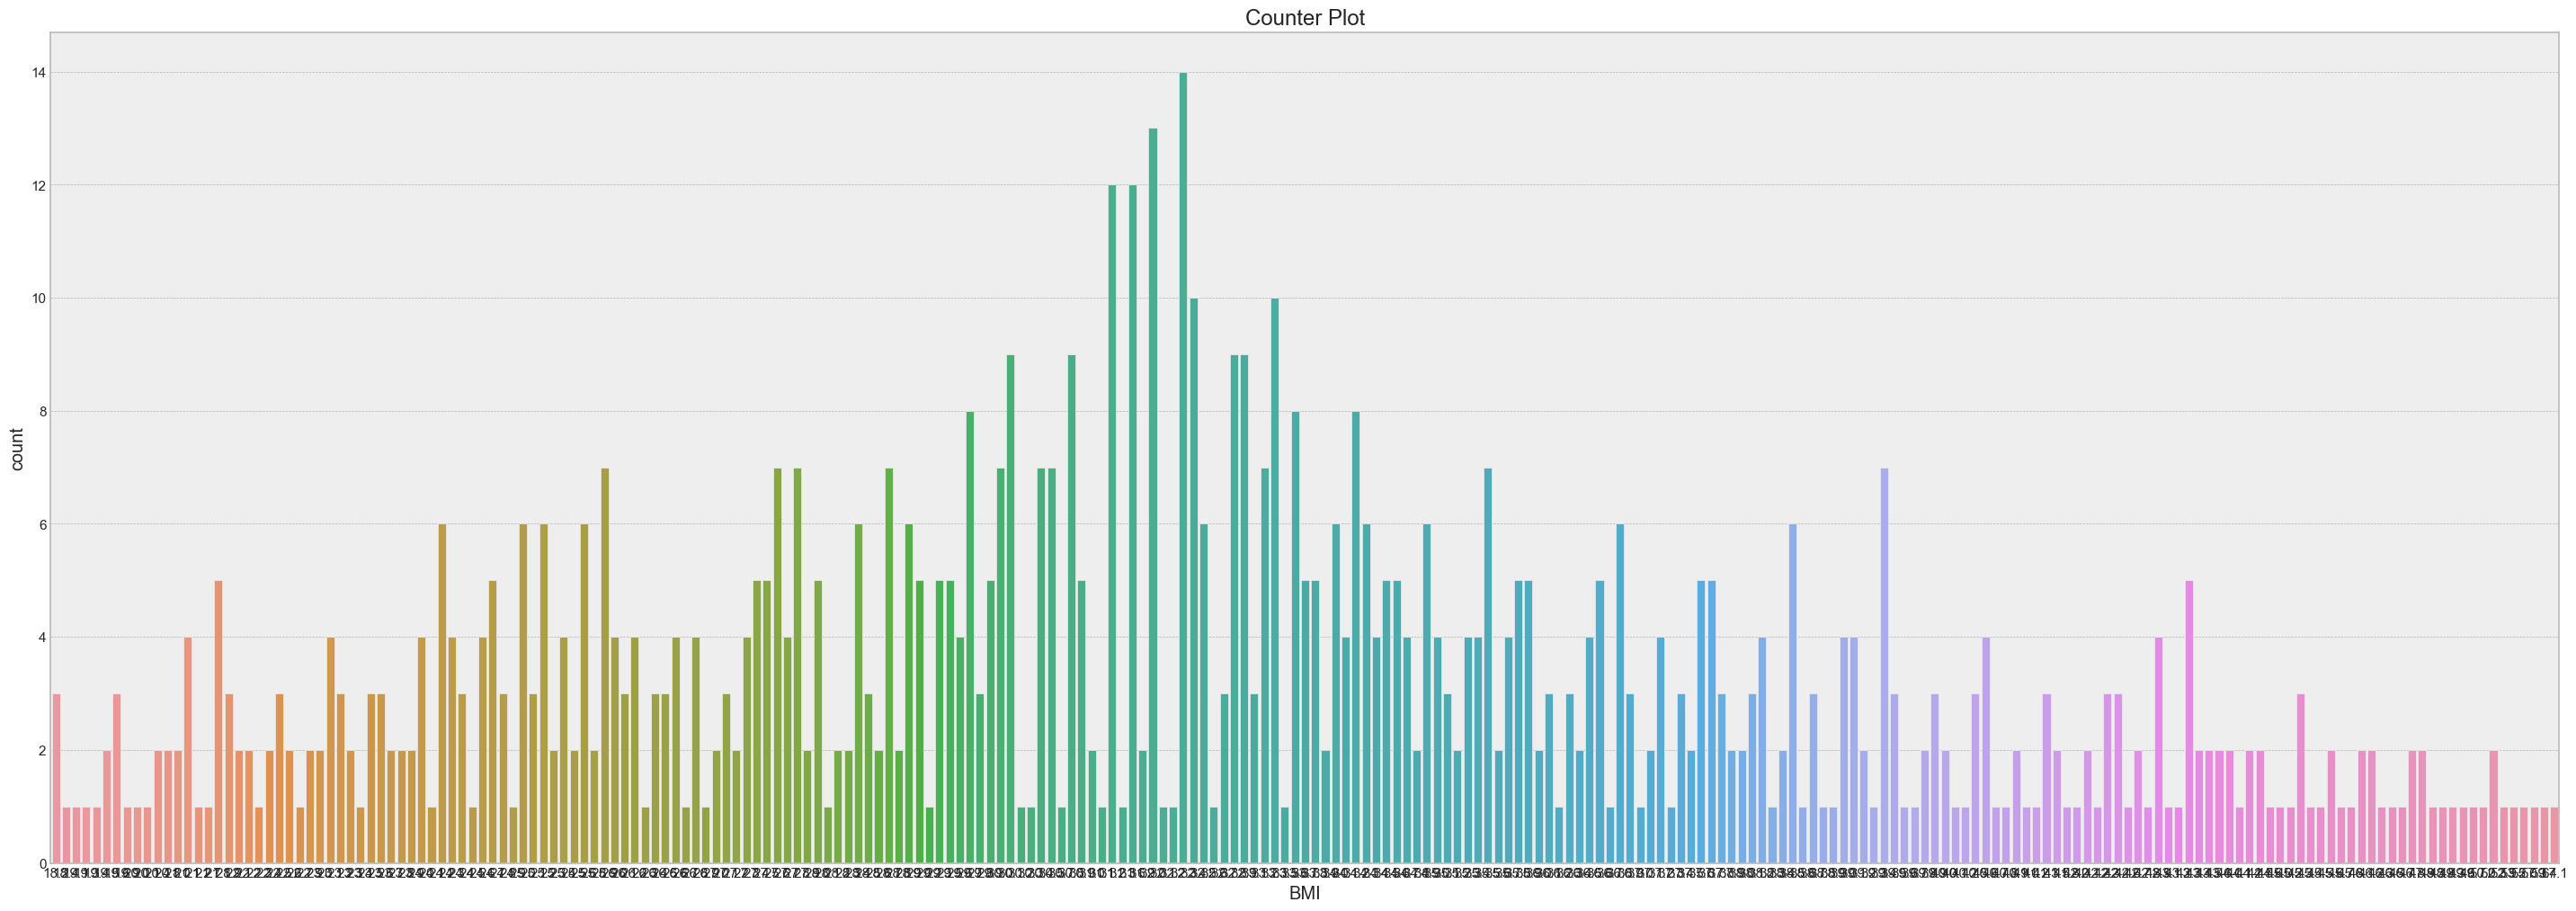

In [13]:
#BMI
plt.figure(figsize=(36,12))

plt.title("Counter Plot")
sb.countplot(x = 'BMI',data = data)

plt.show()

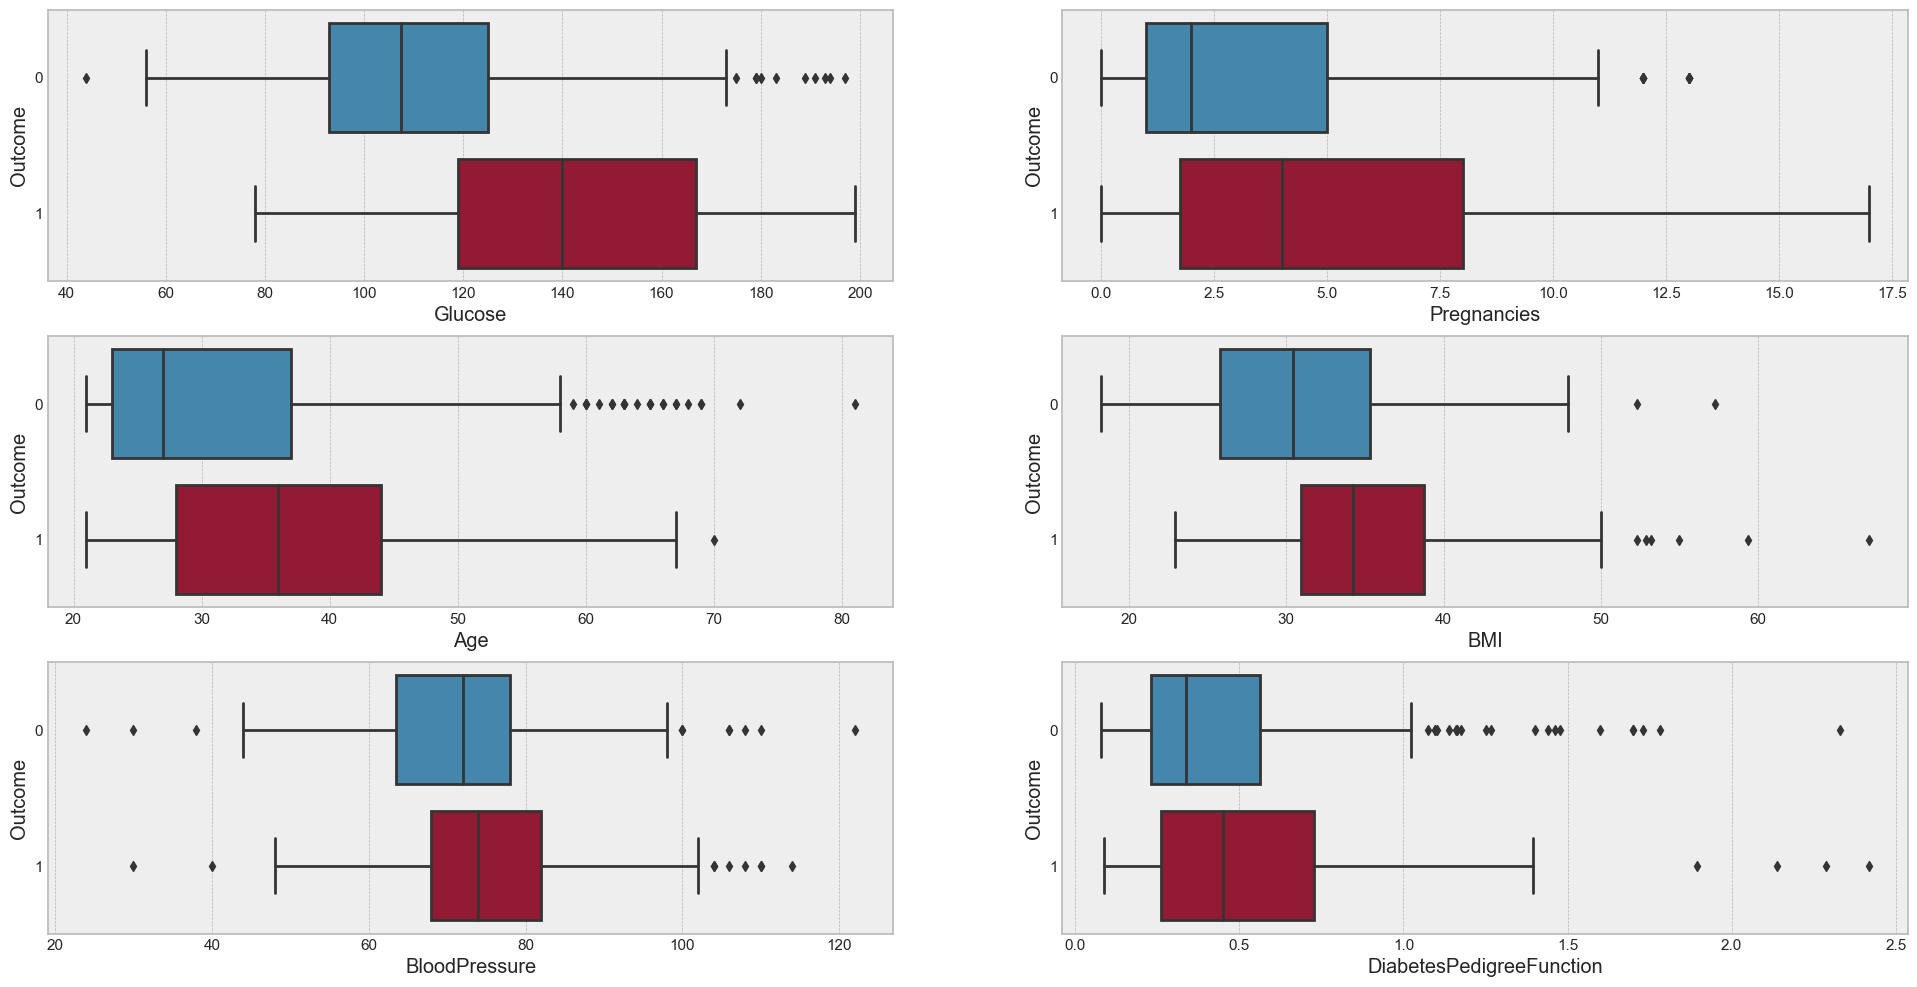

In [14]:
#Categorial Boxplot for Outcome
f, axes = plt.subplots(3, 2, figsize=(24, 12))
sb.boxplot(data= data, x="Glucose", y="Outcome", orient="h", ax = axes[0,0])
sb.boxplot(data= data, x="BMI", y="Outcome", orient="h", ax = axes[1,1])
sb.boxplot(data= data, x="BloodPressure", y="Outcome", orient="h", ax = axes[2,0])
sb.boxplot(data= data, x="Pregnancies", y="Outcome", orient="h", ax = axes[0,1])
sb.boxplot(data= data, x="Age", y="Outcome", orient="h", ax = axes[1,0])
sb.boxplot(data= data, x="DiabetesPedigreeFunction", y="Outcome", orient="h", ax = axes[2,1])
plt.show()

<AxesSubplot:>

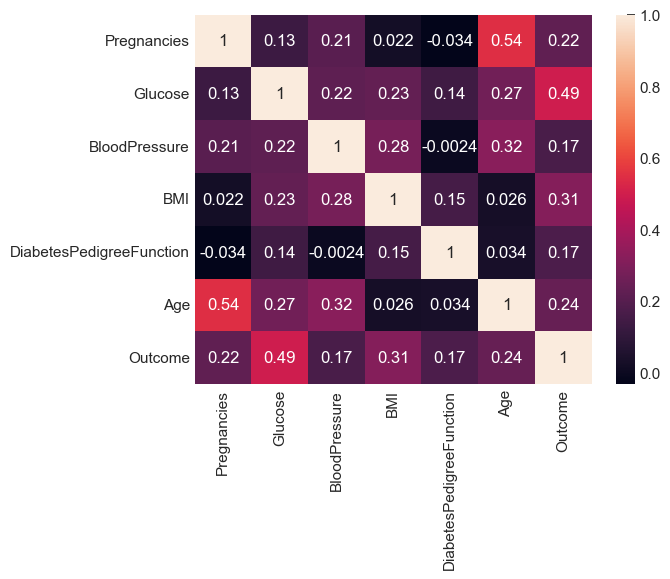

In [15]:
#Correlation Matrix
corr = data.corr()
sb.heatmap(corr,annot=True)

In [16]:
#Function that can be used to calculate linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
linearRegression = LinearRegression()


def calculateLinearRegression(jointFrame,XcolumnName,YcolumnName):
    
    #we test about 20% of the data randomly. Other 80% is used for training.
    testPercentage = math.floor(len(jointFrame) * (20/100))

    TestFrame = jointFrame.sample(testPercentage)
    TrainFrame = jointFrame.loc[~jointFrame.index.isin(TestFrame.index)]

    # Calculate the correlation between the two columns/variables of 2 randomly sampled Data.
    sb.heatmap(jointFrame.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

    
    xAxisTrain = TrainFrame[XcolumnName]
    xAxisTrain = pd.DataFrame(xAxisTrain)

    yAxisTrain = TrainFrame[YcolumnName]
    yAxisTrain = pd.DataFrame(yAxisTrain)

    xAxisTest = TestFrame[XcolumnName]
    xAxisTest = pd.DataFrame(xAxisTest)

    yAxisTest = TestFrame[YcolumnName]
    yAxisTest = pd.DataFrame(yAxisTest)

    # #do linearregression for the Train Data. And calculate the intercept.
    linearRegression.fit(xAxisTrain, yAxisTrain)
    interceptTrain  = linearRegression.intercept_
    coefficientTrain = linearRegression.coef_

    # #formula :coefficient(a) * salePrice + intercept(b)

    x_axis = xAxisTrain #for regression line
    y_axis = coefficientTrain * xAxisTrain + interceptTrain

    #A plot that shows the correlation bewtween Sale Price and Basement Area
    f, axes = plt.subplots(1, 1, figsize=(12, 6))
    plt.scatter(xAxisTrain, yAxisTrain)
    plt.plot(x_axis, y_axis, 'r-', linewidth = 1)
    plt.show()

    # #Goodness of Fit Model:

    yAxisPredict = linearRegression.predict(xAxisTrain)
    yAxisPredict = pd.DataFrame(yAxisPredict)

    #Plot of the Train set using prediction
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    plt.scatter(xAxisTrain, yAxisTrain)
    plt.scatter(xAxisTrain, yAxisPredict, color = "r")
    plt.show()

    yAxisPredict = linearRegression.predict(xAxisTest)
    yAxisPredict = pd.DataFrame(yAxisPredict)
    #this method takes in the y-axis values of predict vs train.
    print("Mean Squared Error: " ,mean_squared_error(yAxisTest, yAxisPredict))


    #Plot of the Test set using prediction
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    plt.scatter(xAxisTest, yAxisTest)
    plt.scatter(xAxisTest, yAxisPredict, color = "r")
    plt.show()
    print("Score : ",linearRegression.score(xAxisTest,yAxisTest))

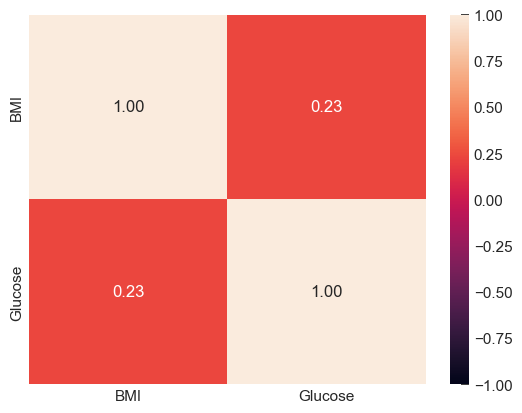

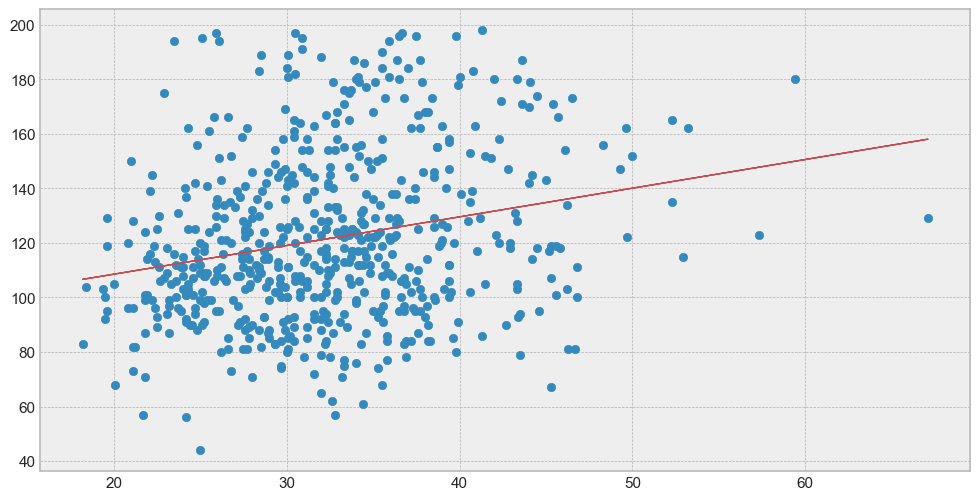

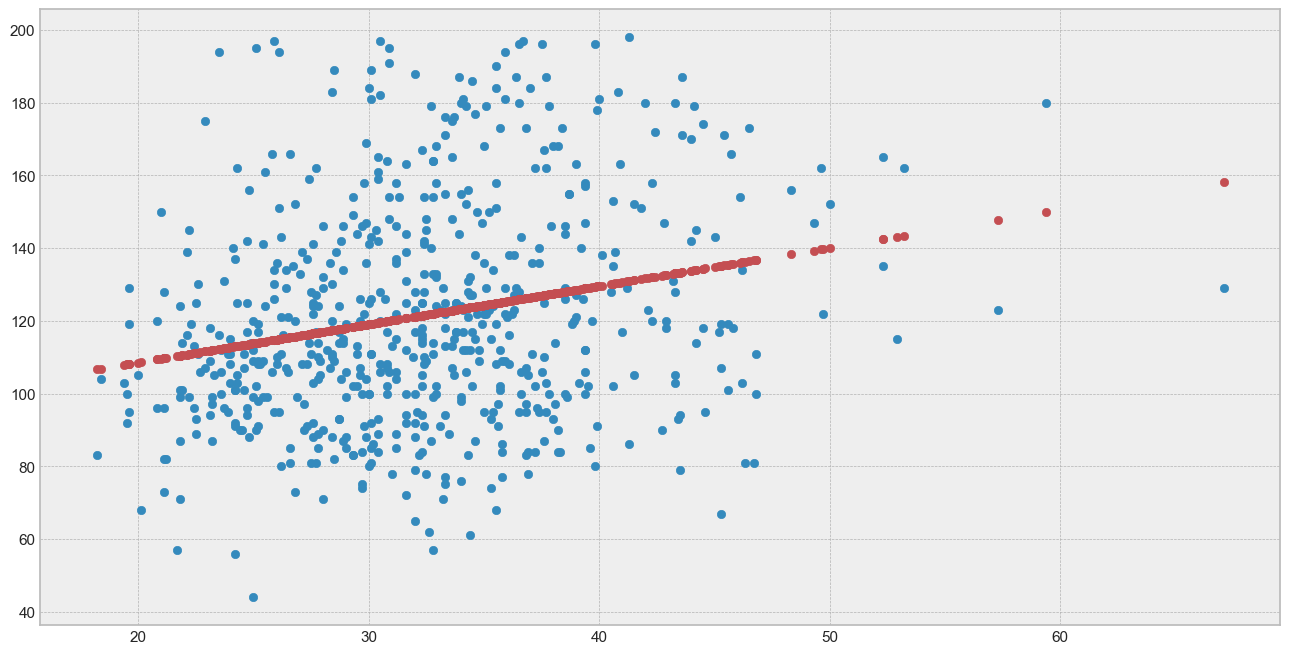

Mean Squared Error:  850.4097322734855


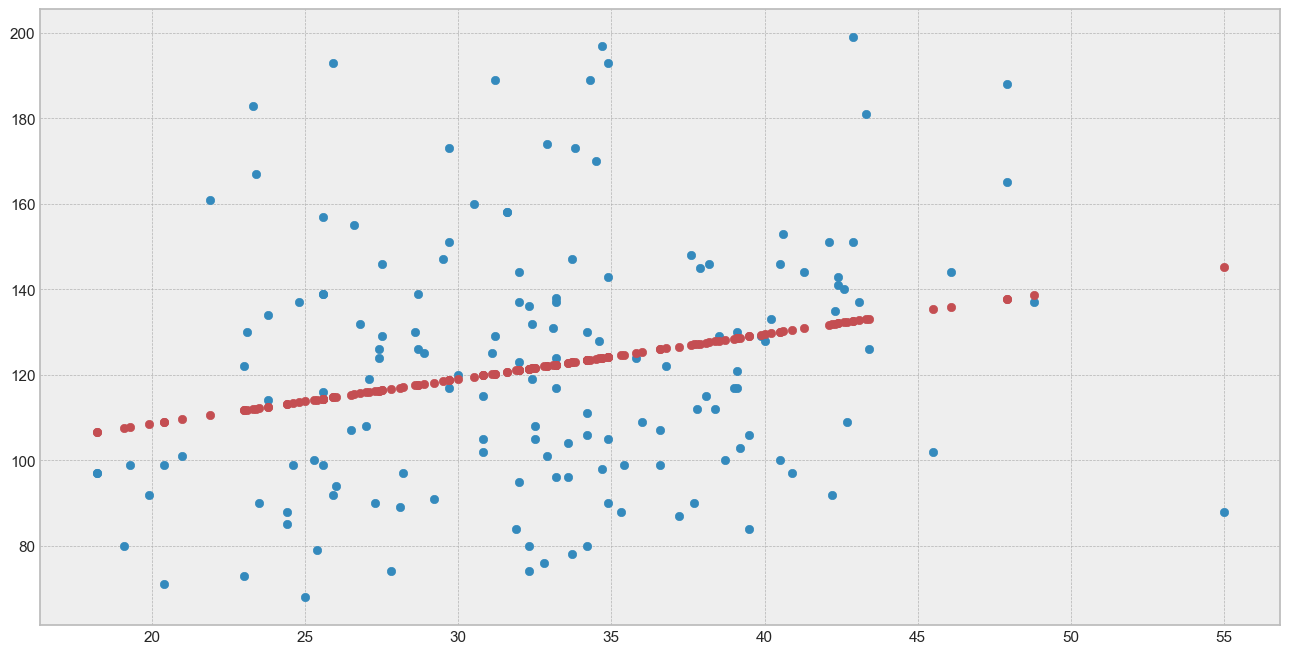

Score :  0.044844988057227586


In [17]:
data = pd.read_csv("diabetes.csv")

#Replace Glucose, BMI, Bloodpressure with median values
data[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = data[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)
data["Glucose"] = data["Glucose"].replace(np.NaN, 117)
data["BMI"] = data["BMI"].replace(np.NaN, 32.3)
data["BloodPressure"] = data["BloodPressure"].replace(np.NaN, 72)


csvFrame = pd.DataFrame(data)

# jointFrame = csvFrame[["BMI","Glucose"]]
# calculateLinearRegression(jointFrame,"BMI","Glucose")

#older age implies an increase in glucose, which 
# jointFrame = csvFrame[["Age","Glucose"]]
# calculateLinearRegression(jointFrame,"Age","Glucose")

jointFrame = csvFrame[["BMI","Glucose"]]
calculateLinearRegression(jointFrame,"BMI","Glucose")

<div class="alert alert-warning">
    <strong>
    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>

BMI & Glucose: We can observe that the correlation for BMI and Glucose is a 0.24, which implies a slight positive correlation. The mean and median value of BMI is 31.99 and 32 respectively, which means that the sample is on people who are obese. This slight correlation suggest that even if you are obese, the higher the BMI, it is more likely that you will haveh higher levels of glucose.<br>

Age & Glucose: The correlatoion for Age & Glucose is 0.27, which implies a slight positive correlation. Even those majority of the people sampled ranges from age 20 to 40, we can still say that as a person ages, it is more likely that they will have higher level of glucose.<br>

Diabetes: Diabetes Pedigree Function, indicates the function which scores likelihood of diabetes based on family history. Cat plot for diabetes pedigree function and outcome(whether will have diabetes): Only a slight relation, meaning that if your family has a history of diabetes, it will only affect your chances of getting diabetes slightly. If we take the outliers of those who do not have diabetes, but their family history has, we can say that it offsets the slight correlation. We have about 20 outliers out of 500 data where their it shows that their family has a history of diabetes.<br>
    </strong>
</div>
